In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
fontsize = 24
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [3]:
def extract_columns(file_list):
    data_dict = {}
    
    for file in file_list:
        with open(file, 'r') as f:
            lines = f.readlines()
            
            # Skip the header line and extract columns 1, 4, and 5
            data = np.loadtxt(lines[1:])[:, [0, 3, 4]]
            
            # Use the filename without the path and extension as the dictionary key
            key = Path(file).parent.name
            data_dict[key] = data
    
    return data_dict

In [4]:
v0_10MW = np.load("./annulus_coefficients/v0_10MW_annulus_coefficients.npy")
v0_15MW = np.load("./annulus_coefficients/v0_15MW_annulus_coefficients.npy")
v0_22MW = np.load("./annulus_coefficients/v0_22MW_annulus_coefficients.npy")

avgs_10MW = np.load("./annulus_coefficients/v0_10MW_rotor_averages.npy")

v2_10MW = np.load("./annulus_coefficients/v2_10MW_annulus_coefficients.npy")
v2_15MW = np.load("./annulus_coefficients/v2_15MW_annulus_coefficients.npy")
v2_22MW = np.load("./annulus_coefficients/v2_22MW_annulus_coefficients.npy")

avgs_15MW = np.load("./annulus_coefficients/v0_15MW_rotor_averages.npy")

v4_10MW = np.load("./annulus_coefficients/v4_10MW_annulus_coefficients.npy")
v4_15MW = np.load("./annulus_coefficients/v4_15MW_annulus_coefficients.npy")
v4_22MW = np.load("./annulus_coefficients/v4_22MW_annulus_coefficients.npy")

avgs_22MW = np.load("./annulus_coefficients/v0_22MW_rotor_averages.npy")

In [5]:
def madsen_func(CT, a, b, c):

    # k1 = 0.0883
    # k2 = 0.0586
    # k3 = 0.2460

    return a * CT**3 + b * CT**2 + c * CT

In [6]:
# Generate fitted values
x = np.linspace(0, 2, 150)
v0_10MW_fit = madsen_func(x, v0_10MW[0], v0_10MW[1], v0_10MW[2])
v2_10MW_fit = madsen_func(x, v2_10MW[0], v2_10MW[1], v2_10MW[2])
v4_10MW_fit = madsen_func(x, v4_10MW[0], v4_10MW[1], v4_10MW[2])

v0_15MW_fit = madsen_func(x, v0_15MW[0], v0_15MW[1], v0_15MW[2])
v2_15MW_fit = madsen_func(x, v2_15MW[0], v2_15MW[1], v2_15MW[2])
v4_15MW_fit = madsen_func(x, v4_15MW[0], v4_15MW[1], v4_15MW[2])

v0_22MW_fit = madsen_func(x, v0_22MW[0], v0_22MW[1], v0_22MW[2])
v2_22MW_fit = madsen_func(x, v2_22MW[0], v2_22MW[1], v2_22MW[2])
v4_22MW_fit = madsen_func(x, v4_22MW[0], v4_22MW[1], v4_22MW[2])

In [7]:
v4 = [0,12]
v2 = [1, 2, 3, 9, 10, 11]
v0 = [4, 5, 6, 7, 8]

/tmp/ipykernel_1828097/1183592259.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(avgs_10MW[0][v4], avgs_10MW[1][v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=1)
/tmp/ipykernel_1828097/1183592259.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(avgs_10MW[0][v2], avgs_10MW[1][v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=1)
/tmp/ipykernel_1828097/1183592259.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(avgs_10MW[0][v0], avgs_10MW[1][v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=1)
/tmp/ipykernel_1828097/1183592259.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(avgs_15MW[0][v4], avgs_15MW[1][v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.5)
/tmp/ipykernel_1828097/1183592259.py:41: UserW

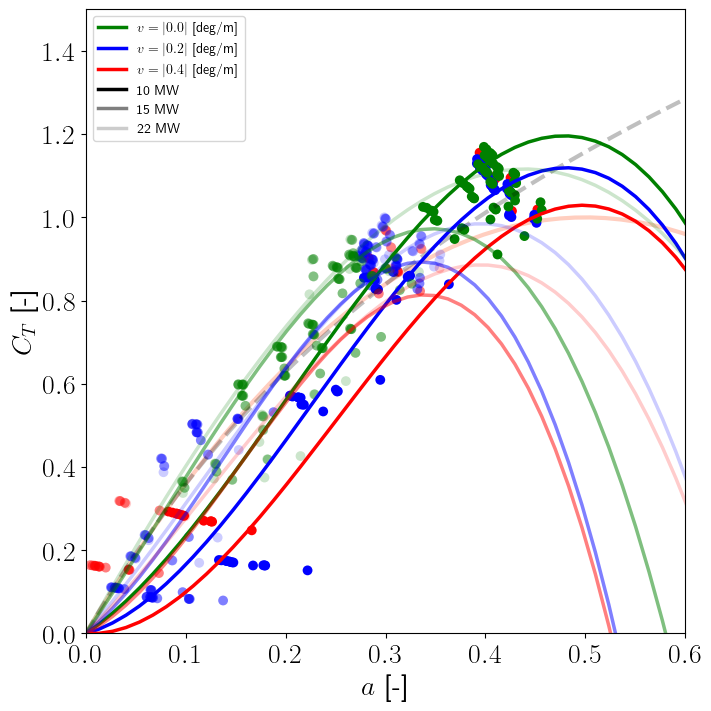

In [8]:
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True,sharex=True, sharey=True)

a_mom  = np.linspace(0,0.75,50)
ct_mom = 4 * a_mom * (1 - a_mom)
ax.plot(a_mom, ct_mom, '#ff3c00',linewidth=3,zorder=1,alpha=0.25)

ct_mad = np.linspace(0,1.5,75)
k1 = 0.2460
k2 = 0.0586
k3 = 0.0883
a_mad = k3 * ct_mad**3 + k2 * ct_mad**2 + k1 * ct_mad
ax.plot(a_mad, ct_mad, 'k--',linewidth=3,zorder=2,alpha=0.25)

ax.plot(x, v0_10MW_fit, 'g-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.0|$ [deg/m]')
ax.plot(x, v2_10MW_fit, 'b-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.2|$ [deg/m]')
ax.plot(x, v4_10MW_fit, 'r-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.4|$ [deg/m]')

ax.plot(x, v0_15MW_fit, 'g-',linewidth=2.5,zorder=2,alpha=0.5,label='')
ax.plot(x, v2_15MW_fit, 'b-',linewidth=2.5,zorder=2,alpha=0.5,label='')
ax.plot(x, v4_15MW_fit, 'r-',linewidth=2.5,zorder=2,alpha=0.5,label='')

ax.plot(x, v0_22MW_fit, 'g-',linewidth=2.5,zorder=2,alpha=0.2,label='')
ax.plot(x, v2_22MW_fit, 'b-',linewidth=2.5,zorder=2,alpha=0.2,label='')
ax.plot(x, v4_22MW_fit, 'r-',linewidth=2.5,zorder=2,alpha=0.2,label='')

ax.plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=1,label='10 MW')
ax.plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.5,label='15 MW')
ax.plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.2,label='22 MW')

ax.set_xlim([0,0.6])
ax.set_ylim([0,1.5])

ax.set_ylabel('$C_T$ [-]', fontsize=20)
ax.set_xlabel('$a$ [-]', fontsize=20)

ax.scatter(avgs_10MW[0][v4], avgs_10MW[1][v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=1)
ax.scatter(avgs_10MW[0][v2], avgs_10MW[1][v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=1)
ax.scatter(avgs_10MW[0][v0], avgs_10MW[1][v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=1)

ax.scatter(avgs_15MW[0][v4], avgs_15MW[1][v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.5)
ax.scatter(avgs_15MW[0][v2], avgs_15MW[1][v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=0.5)
ax.scatter(avgs_15MW[0][v0], avgs_15MW[1][v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=0.5)

ax.scatter(avgs_22MW[0][v4], avgs_22MW[1][v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.2)
ax.scatter(avgs_22MW[0][v2], avgs_22MW[1][v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=0.2)
ax.scatter(avgs_22MW[0][v0], avgs_22MW[1][v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=0.2)

ax.legend()

plt.savefig(f"./figs/Madsen_rotor_comparison_v1.png", bbox_inches="tight", dpi=600)

/tmp/ipykernel_1828097/433773616.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[2].scatter(avgs_10MW[0][:,v4], avgs_10MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=1)
/tmp/ipykernel_1828097/433773616.py:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(avgs_10MW[0][:,v2], avgs_10MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=1)
/tmp/ipykernel_1828097/433773616.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(avgs_10MW[0][:,v0], avgs_10MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=1)
/tmp/ipykernel_1828097/433773616.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[2].scatter(avgs_15MW[0][:,v4], avgs_15MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.5)
/tmp/ipykernel_1828097

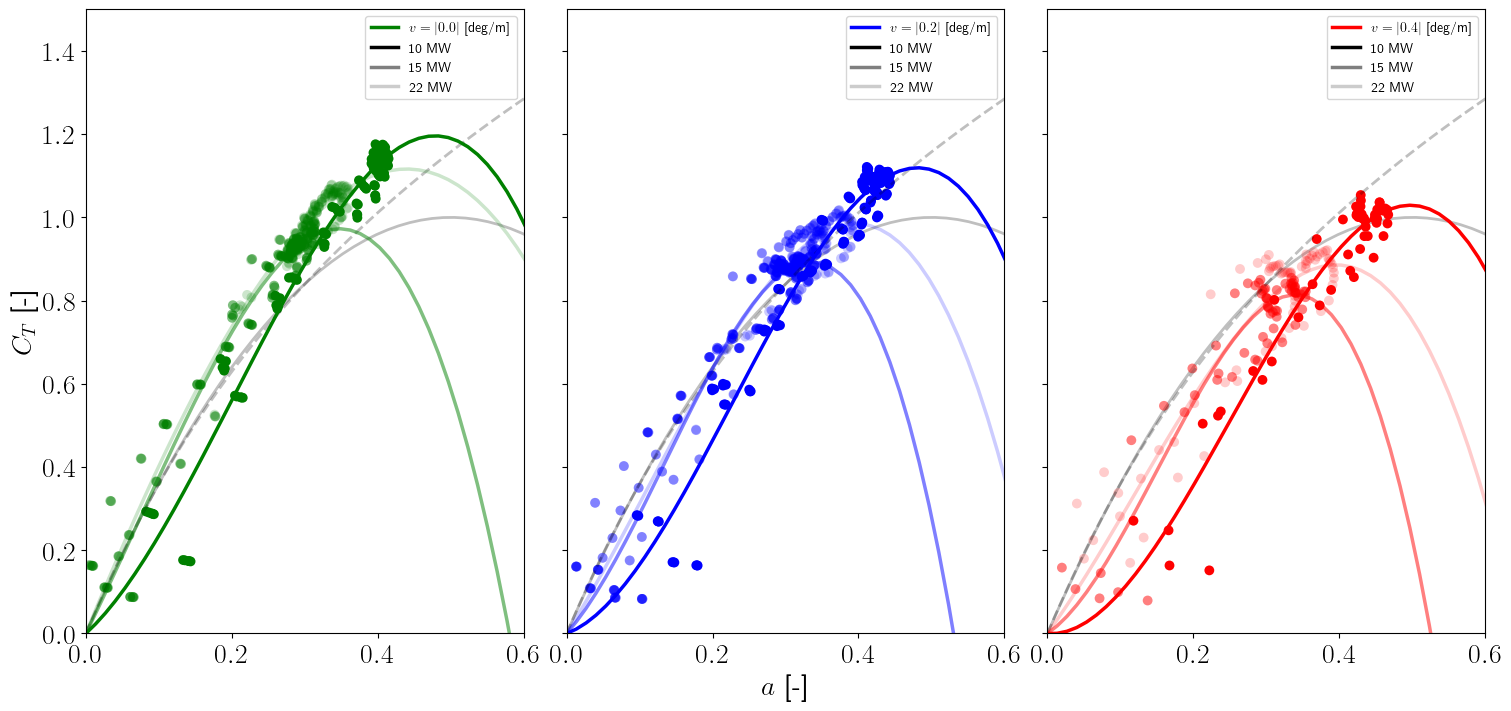

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15, 7), constrained_layout=True,sharex=True, sharey=True)

a_mom  = np.linspace(0,0.75,50)
ct_mom = 4 * a_mom * (1 - a_mom)

ct_mad = np.linspace(0,1.5,75)
k1 = 0.2460
k2 = 0.0586
k3 = 0.0883
a_mad = k3 * ct_mad**3 + k2 * ct_mad**2 + k1 * ct_mad

for i in range(3):
    ax[i].plot(a_mom, ct_mom, 'k',linewidth=2,zorder=1,alpha=0.25)

    ax[i].plot(a_mad, ct_mad, 'k--',linewidth=2,zorder=2,alpha=0.25)

    ax[i].set_xlim([0,0.6])
    ax[i].set_ylim([0,1.5])

ax[0].set_ylabel('$C_T$ [-]', fontsize=20)
ax[1].set_xlabel('$a$ [-]', fontsize=20)

ax[0].plot(x, v0_10MW_fit, 'g-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.0|$ [deg/m]')
ax[1].plot(x, v2_10MW_fit, 'b-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.2|$ [deg/m]')
ax[2].plot(x, v4_10MW_fit, 'r-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.4|$ [deg/m]')

ax[0].plot(x, v0_15MW_fit, 'g-',linewidth=2.5,zorder=2,alpha=0.5,label='')
ax[1].plot(x, v2_15MW_fit, 'b-',linewidth=2.5,zorder=2,alpha=0.5,label='')
ax[2].plot(x, v4_15MW_fit, 'r-',linewidth=2.5,zorder=2,alpha=0.5,label='')

ax[0].plot(x, v0_22MW_fit, 'g-',linewidth=2.5,zorder=2,alpha=0.2,label='')
ax[1].plot(x, v2_22MW_fit, 'b-',linewidth=2.5,zorder=2,alpha=0.2,label='')
ax[2].plot(x, v4_22MW_fit, 'r-',linewidth=2.5,zorder=2,alpha=0.2,label='')

ax[0].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=1,label='10 MW')
ax[0].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.5,label='15 MW')
ax[0].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.2,label='22 MW')

ax[1].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=1,label='10 MW')
ax[1].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.5,label='15 MW')
ax[1].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.2,label='22 MW')

ax[2].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=1,label='10 MW')
ax[2].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.5,label='15 MW')
ax[2].plot([-1,-1], [0,1], 'k-',linewidth=2.5,zorder=2,alpha=0.2,label='22 MW')


ax[2].scatter(avgs_10MW[0][:,v4], avgs_10MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=1)
ax[1].scatter(avgs_10MW[0][:,v2], avgs_10MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=1)
ax[0].scatter(avgs_10MW[0][:,v0], avgs_10MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=1)

ax[2].scatter(avgs_15MW[0][:,v4], avgs_15MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.5)
ax[1].scatter(avgs_15MW[0][:,v2], avgs_15MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=0.5)
ax[0].scatter(avgs_15MW[0][:,v0], avgs_15MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=0.5)

ax[2].scatter(avgs_22MW[0][:,v4], avgs_22MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.2)
ax[1].scatter(avgs_22MW[0][:,v2], avgs_22MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=0.2)
ax[0].scatter(avgs_22MW[0][:,v0], avgs_22MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=0.2)

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.savefig(f"./figs/Madsen_rotor_comparison_v2.png", bbox_inches="tight", dpi=600)


In [14]:
# V4

a_mom = np.linspace(0,0.1,50)
ct_mom = 4 * a_mom * (1 - a_mom)

a_mom = np.append(a_mom, avgs_10MW[0][:,v4])
# a_mom = np.append(a_mom, avgs_15MW[0][:,v4])
# a_mom = np.append(a_mom, avgs_22MW[0][:,v4])

ct_mom = np.append(ct_mom, avgs_10MW[1][:,v4])
# ct_mom = np.append(ct_mom, avgs_15MW[1][:,v4])
# ct_mom = np.append(ct_mom, avgs_22MW[1][:,v4])

ct_mom_ht = np.linspace(1.2,2,50)
a_mom_ht  = 0.0883*ct_mom_ht**3 + 0.0586*ct_mom_ht**2 + 0.2460 * ct_mom_ht

a_mom = np.append(a_mom, a_mom_ht)
ct_mom = np.append(ct_mom, ct_mom_ht)

# Perform curve fitting
params, covariance = curve_fit(madsen_func, ct_mom, a_mom)

# Extract fitted parameters
a_fit_v4, b_fit_v4, c_fit_v4 = params
print(f"Fitted parameters: a = {a_fit_v4:.3f}, b = {b_fit_v4:.3f}, c = {c_fit_v4:.3f},")
np.save("./annulus_coefficients/v4_all_turbine_coefficients.npy", [a_fit_v4,b_fit_v4,c_fit_v4])

# Generate fitted values
y_fit_v4 = madsen_func(x, a_fit_v4, b_fit_v4, c_fit_v4)

Fitted parameters: a = 0.127, b = -0.101, c = 0.407,


In [16]:
# V2

a_mom = np.linspace(0,0.1,50)
ct_mom = 4 * a_mom * (1 - a_mom)

a_mom = np.append(a_mom, avgs_10MW[0][:,v2])
# a_mom = np.append(a_mom, avgs_15MW[0][:,v2])
# a_mom = np.append(a_mom, avgs_22MW[0][:,v2])

ct_mom = np.append(ct_mom, avgs_10MW[1][:,v2])
# ct_mom = np.append(ct_mom, avgs_15MW[1][:,v2])
# ct_mom = np.append(ct_mom, avgs_22MW[1][:,v2])

ct_mom_ht = np.linspace(1.2,2,50)
a_mom_ht  = 0.0883*ct_mom_ht**3 + 0.0586*ct_mom_ht**2 + 0.2460 * ct_mom_ht

a_mom = np.append(a_mom, a_mom_ht)
ct_mom = np.append(ct_mom, ct_mom_ht)

# Perform curve fitting
params, covariance = curve_fit(madsen_func, ct_mom, a_mom)

# Extract fitted parameters
a_fit_v2, b_fit_v2, c_fit_v2 = params
print(f"Fitted parameters: a = {a_fit_v2:.3f}, b = {b_fit_v2:.3f}, c = {c_fit_v2:.3f},")
np.save("./annulus_coefficients/v2_all_turbine_coefficients.npy", [a_fit_v2,b_fit_v2,c_fit_v2])

# Generate fitted values
y_fit_v2 = madsen_func(x, a_fit_v2, b_fit_v2, c_fit_v2)

Fitted parameters: a = 0.172, b = -0.170, c = 0.383,


In [17]:
# V0

a_mom = np.linspace(0,0.1,50)
ct_mom = 4 * a_mom * (1 - a_mom)

a_mom = np.append(a_mom, avgs_10MW[0][:,v0])
# a_mom = np.append(a_mom, avgs_15MW[0][:,v0])
# a_mom = np.append(a_mom, avgs_22MW[0][:,v0])

ct_mom = np.append(ct_mom, avgs_10MW[1][:,v0])
# ct_mom = np.append(ct_mom, avgs_15MW[1][:,v0])
# ct_mom = np.append(ct_mom, avgs_22MW[1][:,v0])

ct_mom_ht = np.linspace(1.2,2,50)
a_mom_ht  = 0.0883*ct_mom_ht**3 + 0.0586*ct_mom_ht**2 + 0.2460 * ct_mom_ht

a_mom = np.append(a_mom, a_mom_ht)
ct_mom = np.append(ct_mom, ct_mom_ht)

# Perform curve fitting
params, covariance = curve_fit(madsen_func, ct_mom, a_mom)

# Extract fitted parameters
a_fit_v0, b_fit_v0, c_fit_v0 = params
print(f"Fitted parameters: a = {a_fit_v0:.3f}, b = {b_fit_v0:.3f}, c = {c_fit_v0:.3f},")
np.save("./annulus_coefficients/v0_all_turbine_coefficients.npy", [a_fit_v0,b_fit_v0,c_fit_v0])

# Generate fitted values
y_fit_v0 = madsen_func(x, a_fit_v0, b_fit_v0, c_fit_v0)

Fitted parameters: a = 0.184, b = -0.149, c = 0.308,


/tmp/ipykernel_1828097/2501212881.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[2].scatter(avgs_10MW[0][:,v4], avgs_10MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=1)
/tmp/ipykernel_1828097/2501212881.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(avgs_10MW[0][:,v2], avgs_10MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=1)
/tmp/ipykernel_1828097/2501212881.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(avgs_10MW[0][:,v0], avgs_10MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=1)
/tmp/ipykernel_1828097/2501212881.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[2].scatter(avgs_15MW[0][:,v4], avgs_15MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.4)
/tmp/ipykernel_182

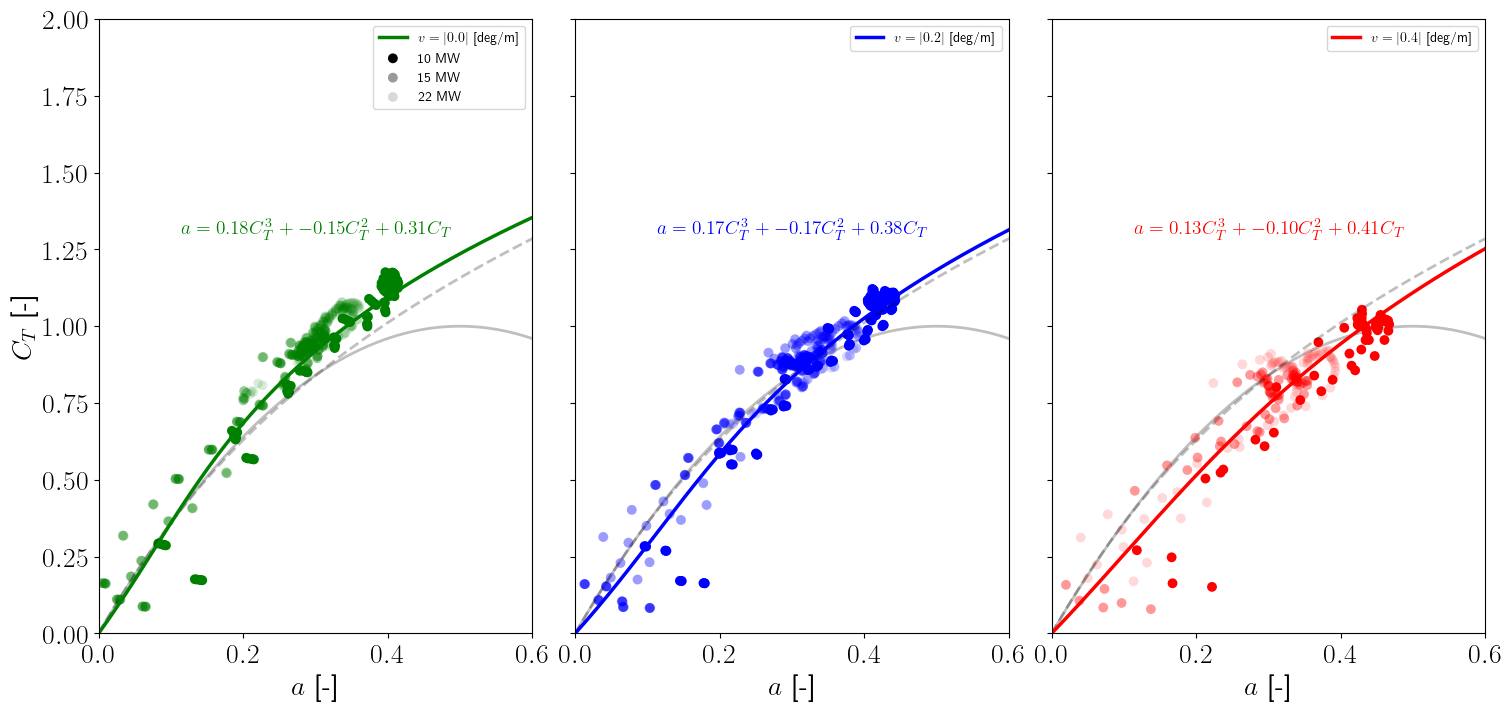

In [18]:
fig, ax = plt.subplots(1,3,figsize=(15, 7), constrained_layout=True,sharex=True, sharey=True)

a_mom  = np.linspace(0,1,100)
ct_mom = 4 * a_mom * (1 - a_mom)

ct_mad = np.linspace(0,2,100)
k1 = 0.2460
k2 = 0.0586
k3 = 0.0883
a_mad = k3 * ct_mad**3 + k2 * ct_mad**2 + k1 * ct_mad

for i in range(3):
    ax[i].plot(a_mom, ct_mom, 'k',linewidth=2,zorder=1,alpha=0.25)

    ax[i].plot(a_mad, ct_mad, 'k--',linewidth=2,zorder=2,alpha=0.25)

    ax[i].set_xlim([0,0.6])
    ax[i].set_ylim([0,2])

ax[0].set_ylabel('$C_T$ [-]', fontsize=20)
ax[1].set_xlabel('$a$ [-]', fontsize=20)

ax[0].plot(y_fit_v0, x, 'g-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.0|$ [deg/m]')
ax[1].plot(y_fit_v2, x, 'b-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.2|$ [deg/m]')
ax[2].plot(y_fit_v4, x, 'r-',linewidth=2.5,zorder=2,alpha=1,label='$v = |0.4|$ [deg/m]')

ax[0].set_ylabel('$C_T$ [-]', fontsize=20)
ax[0].set_xlabel('$a$ [-]', fontsize=20)
ax[1].set_xlabel('$a$ [-]', fontsize=20)
ax[2].set_xlabel('$a$ [-]', fontsize=20)

ax[2].scatter(avgs_10MW[0][:,v4], avgs_10MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=1)
ax[1].scatter(avgs_10MW[0][:,v2], avgs_10MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=1)
ax[0].scatter(avgs_10MW[0][:,v0], avgs_10MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=1)

ax[2].scatter(avgs_15MW[0][:,v4], avgs_15MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.4)
ax[1].scatter(avgs_15MW[0][:,v2], avgs_15MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=0.4)
ax[0].scatter(avgs_15MW[0][:,v0], avgs_15MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=0.4)

ax[2].scatter(avgs_22MW[0][:,v4], avgs_22MW[1][:,v4], cmap='viridis', s=50, edgecolor='none',color='r',alpha=0.15)
ax[1].scatter(avgs_22MW[0][:,v2], avgs_22MW[1][:,v2], cmap='viridis', s=50, edgecolor='none',color='b',alpha=0.15)
ax[0].scatter(avgs_22MW[0][:,v0], avgs_22MW[1][:,v0], cmap='viridis', s=50, edgecolor='none',color='g',alpha=0.15)


ax[0].scatter(-1,-1, cmap='viridis', s=50, edgecolor='none',color='k',alpha=1,label='10 MW')
ax[0].scatter(-1,-1, cmap='viridis', s=50, edgecolor='none',color='k',alpha=0.4,label='15 MW')
ax[0].scatter(-1,-1, cmap='viridis', s=50, edgecolor='none',color='k',alpha=0.15,label='22 MW')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].text(0.3,1.3, f'$a = {a_fit_v0:0.2f}C_T^3 + {b_fit_v0:0.2f}C_T^2 + {c_fit_v0:0.2f}C_T$', ha='center', fontsize=14,rotation=0,color='green')
ax[1].text(0.3,1.3, f'$a = {a_fit_v2:0.2f}C_T^3 + {b_fit_v2:0.2f}C_T^2 + {c_fit_v2:0.2f}C_T$', ha='center', fontsize=14,rotation=0,color='blue')
ax[2].text(0.3,1.3, f'$a = {a_fit_v4:0.2f}C_T^3 + {b_fit_v4:0.2f}C_T^2 + {c_fit_v4:0.2f}C_T$', ha='center', fontsize=14,rotation=0,color='red')

plt.savefig(f"./figs/wrf_all_turbines_annulus.png", bbox_inches="tight", dpi=600)